In [1]:
#https://mlrose.readthedocs.io/en/stable/source/algorithms.html

# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, validation_curve
from sklearn import metrics
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras import optimizers
import time
import mlrose

# Set random seed 
import random
random.seed(27)

# Plot inline
%matplotlib inline


Using TensorFlow backend.
C:\Users\tg784d\anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [71]:
# mlrose optimization exmaple: 8-Queens
# https://mlrose.readthedocs.io/en/stable/source/tutorial1.html

# Define fitness function object
#fitness = mlrose.Queens()

# Define alternative N-Queens fitness function for maximization problem
def queens_max(state):

    # Initialize counter
    fitness_cnt = 0

    # For all pairs of queens
    for i in range(len(state) - 1):
        for j in range(i + 1, len(state)):

        # Check for horizontal, diagonal-up and diagonal-down attacks
            if (state[j] != state[i]) \
                and (state[j] != state[i] + (j - i)) \
                and (state[j] != state[i] - (j - i)):

                # If no attacks, then increment counter
                fitness_cnt += 1

    return fitness_cnt

# Initialize custom fitness function object
fitness_cust = mlrose.CustomFitness(queens_max)

# Define initial state
state = np.array([0, 1, 2, 3, 4, 5, 6, 7])
#state = np.array([1, 4, 1, 3, 5, 5, 2, 7, 2, 4, 5, 7, 0, 6, 7, 1])

# Define optimization problem object
problem_fit = mlrose.DiscreteOpt(length = len(state), fitness_fn = fitness_cust, maximize = True, max_val = len(state))

# Genetic Algorithm
pop_size = [10, 50, 100, 200, 300]
mutation_prob = [0.05, 0.1, 0.2, 0.5]
max_attempts = [1, 5, 10, 25, 50]

ga_Data = []

for p in pop_size:
    for mp in mutation_prob:
        for ma in max_attempts:
            start = time.time()
            best_state, best_fitness, iter_fit = mlrose.genetic_alg(problem_fit, pop_size = p, mutation_prob = mp, max_attempts = ma, curve = True, random_state = 2)
            end = time.time() - start
            n_iters = len(iter_fit)
            ga_Data.append([p, mp, ma, n_iters, best_fitness])
    print("GA finished iterating on pop_size: %s"%p)
ga = pd.DataFrame(columns = ['Population_Size', 'Mutation_Prob', 'Max_Attempts', 'Num_Iters', 'Best_Fitness'], data = ga_Data)

print("The best population size and mutation probabilty for Genetic Algorithm is:")
print(ga.loc[ga['Best_Fitness'].idxmax()])
print("")

# Simulated Annealing
exp = [0.05, 0.1, 0.25, 0.5, 0.75, 0.95]
max_attempts = [1, 5, 10, 25, 50]

sa_Data = []

for n in exp:
    for ma in max_attempts:
        start = time.time()
        best_state, best_fitness, iter_fit = mlrose.simulated_annealing(problem_fit, schedule = mlrose.ExpDecay(init_temp = 10, exp_const = n, min_temp =1), max_attempts = ma, init_state = state, curve = True, random_state = 2)
        end = time.time() - start
        n_iters = len(iter_fit)
        sa_Data.append([n, ma, n_iters, best_fitness])
    print("SA finished iterating on exp: %s"%n)
sa = pd.DataFrame(columns = ['Exponent', 'Max_Attempts', 'Num_Iters', 'Best_Fitness'], data = sa_Data)

print("The best cooling exponent for Simulated Annealing is:")
print(sa.loc[sa['Best_Fitness'].idxmax()])
print("")

# MIMIC
pop_size = [10, 50, 100, 200, 300]
keep_pct = [0.05, 0.1, 0.2, 0.5]
max_attempts = [1, 5, 10, 25, 50]

mimic_Data = []

for p in pop_size:
    for kp in keep_pct:
        for ma in max_attempts:
            start = time.time()
            best_state, best_fitness, iter_fit = mlrose.mimic(problem_fit, pop_size = p, keep_pct = kp, max_attempts = ma, curve = True, random_state = 2)
            end = time.time() - start
            n_iters = len(iter_fit)
            mimic_Data.append([p, kp, ma, n_iters, best_fitness])
    print("MIMIC finished iterating on pop_size: %s"%p)
mimic = pd.DataFrame(columns = ['Population_Size', 'Keep_Pct', 'Max_Attempts', 'Num_Iters', 'Best_Fitness'], data = mimic_Data)

print("The best population size and keep percent for MIMIC is:")
print(mimic.loc[mimic['Best_Fitness'].idxmax()])
print("")

GA finished iterating on pop_size: 10
GA finished iterating on pop_size: 50
GA finished iterating on pop_size: 100
GA finished iterating on pop_size: 200
GA finished iterating on pop_size: 300
The best population size and mutation probabilty for Genetic Algorithm is:
Population_Size    300.0
Mutation_Prob        0.5
Max_Attempts        25.0
Num_Iters           56.0
Best_Fitness        28.0
Name: 98, dtype: float64

SA finished iterating on exp: 0.05
SA finished iterating on exp: 0.1
SA finished iterating on exp: 0.25
SA finished iterating on exp: 0.5
SA finished iterating on exp: 0.75
SA finished iterating on exp: 0.95
The best cooling exponent for Simulated Annealing is:
Exponent            0.05
Max_Attempts       25.00
Num_Iters       55706.00
Best_Fitness       27.00
Name: 3, dtype: float64

MIMIC finished iterating on pop_size: 10
MIMIC finished iterating on pop_size: 50
MIMIC finished iterating on pop_size: 100
MIMIC finished iterating on pop_size: 200
MIMIC finished iterating on 

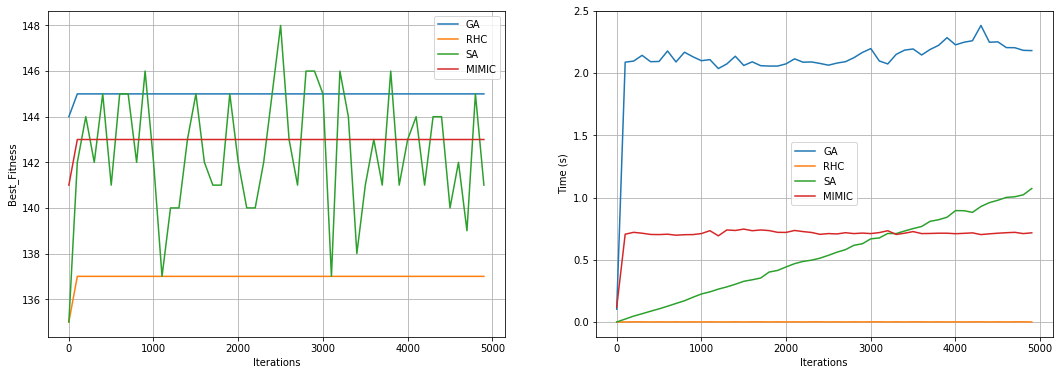

In [3]:
# Apply the hyperparamters found to each of the algorithms and plot over iterations


# Define alternative N-Queens fitness function for maximization problem
def queens_max(state):

    # Initialize counter
    fitness_cnt = 0

    # For all pairs of queens
    for i in range(len(state) - 1):
        for j in range(i + 1, len(state)):

        # Check for horizontal, diagonal-up and diagonal-down attacks
            if (state[j] != state[i]) \
                and (state[j] != state[i] + (j - i)) \
                and (state[j] != state[i] - (j - i)):

                # If no attacks, then increment counter
                fitness_cnt += 1

    return fitness_cnt

# Initialize custom fitness function object
fitness_cust = mlrose.CustomFitness(queens_max)

# Define initial state
state = np.array([0, 1, 2, 3, 4, 5, 6, 7, 1, 4, 5, 3, 5, 8, 0, 4, 6, 8])
#state = np.array([1, 4, 1, 3, 5, 5, 2, 7, 2, 4, 5, 7, 0, 6, 7, 1])

# Define optimization problem object
problem_fit = mlrose.DiscreteOpt(length = len(state), fitness_fn = fitness_cust, maximize = True, max_val = len(state))


# Define variables
ga_fitness = []
ga_time = []
rhc_fitness = []
rhc_time = []
sa_fitness = []
sa_time = []
mimic_fitness = []
mimic_time = []

#iters = [1, 5, 10, 15, 20, 25, 50, 100, 150, 500, 1000, 1500, 2000, 2500]
iters = range(1,5001,100)
# Genetic Algorithm
for n in iters:
    start = time.time()
    best_state, best_fitness = mlrose.genetic_alg(problem_fit, pop_size = 300, mutation_prob = 0.5, max_attempts = 25, max_iters = n, curve = False, random_state = 2)
    end = time.time() - start
    ga_fitness.append(best_fitness)
    ga_time.append(end)
    
# Random Hill Climbing
for n in iters:
    start = time.time()
    best_state, best_fitness = mlrose.random_hill_climb(problem_fit, max_attempts = 5, max_iters = n, random_state = 2)
    end = time.time() - start
    rhc_fitness.append(best_fitness)
    rhc_time.append(end)
    
# Simulated Annealing
for n in iters:
    start = time.time()
    best_state, best_fitness = mlrose.simulated_annealing(problem_fit, schedule = mlrose.ExpDecay(init_temp = 10, exp_const = 0.05, min_temp =1), max_attempts = 25, max_iters = n, init_state = None, curve = False, random_state = 2)
    end = time.time() - start
    sa_fitness.append(best_fitness)
    sa_time.append(end)

# MIMIC
for n in iters:
    start = time.time()
    best_state, best_fitness = mlrose.mimic(problem_fit, pop_size = 50, keep_pct = 0.5, max_attempts = 5, max_iters = n, curve = False, random_state = 2)
    end = time.time() - start
    mimic_fitness.append(best_fitness)
    mimic_time.append(end)


fig = plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.plot(iters, ga_fitness, label = 'GA')
plt.plot(iters, rhc_fitness, label = 'RHC')
plt.plot(iters, sa_fitness, label = 'SA')
plt.plot(iters, mimic_fitness, label = 'MIMIC')
plt.xlabel('Iterations')
plt.ylabel('Best_Fitness')
plt.grid(True)
plt.legend()
plt.subplot(1,2,2)
plt.plot(iters, ga_time, label = 'GA')
plt.plot(iters, rhc_time, label = 'RHC')
plt.plot(iters, sa_time, label = 'SA')
plt.plot(iters, mimic_time, label = 'MIMIC')
plt.xlabel('Iterations')
plt.ylabel('Time (s)')
plt.grid(True)
plt.legend()


In [48]:
# Graphs to explore Simulated Annealing

# Define alternative N-Queens fitness function for maximization problem
def queens_max(state):

    # Initialize counter
    fitness_cnt = 0

    # For all pairs of queens
    for i in range(len(state) - 1):
        for j in range(i + 1, len(state)):

        # Check for horizontal, diagonal-up and diagonal-down attacks
            if (state[j] != state[i]) \
                and (state[j] != state[i] + (j - i)) \
                and (state[j] != state[i] - (j - i)):

                # If no attacks, then increment counter
                fitness_cnt += 1

    return fitness_cnt

# Initialize custom fitness function object
fitness_cust = mlrose.CustomFitness(queens_max)

# Define initial state
state = np.array([0, 1, 2, 3, 4, 5, 6, 7, 1, 4, 5, 3, 5, 8, 0, 4, 6, 8])
#state = np.array([1, 4, 1, 3, 5, 5, 2, 7, 2, 4, 5, 7, 0, 6, 7, 1])

# Define optimization problem object
problem_fit = mlrose.DiscreteOpt(length = len(state), fitness_fn = fitness_cust, maximize = True, max_val = len(state))

exp = [0.05, 0.1, 0.25, 0.5, 0.75, 0.95]

sa_fitness = []
sa_time = []

for n in exp:
    start = time.time()
    best_state, best_fitness = mlrose.simulated_annealing(problem_fit, schedule = mlrose.ExpDecay(init_temp = 10, exp_const = n, min_temp =1), max_attempts = 25, init_state = state, curve = False, random_state = 2)
    end = time.time() - start
    sa_fitness.append(best_fitness)
    sa_time.append(end)
    print("SA finished iterating on exp: %s"%n)

SA finished iterating on exp: 0.05
SA finished iterating on exp: 0.1
SA finished iterating on exp: 0.25
SA finished iterating on exp: 0.5
SA finished iterating on exp: 0.75
SA finished iterating on exp: 0.95


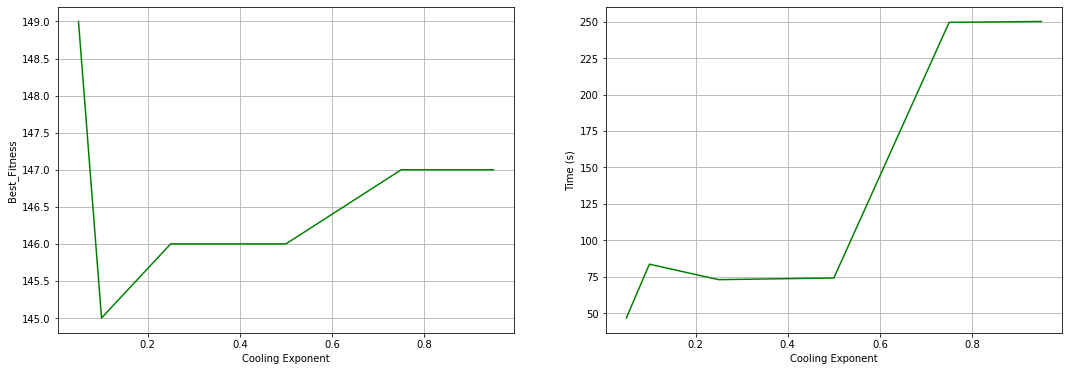

In [49]:
# Plot the data
fig = plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.plot(exp, sa_fitness, color='green')
plt.xlabel('Cooling Exponent')
plt.ylabel('Best_Fitness')
plt.grid(True)
plt.subplot(1,2,2)
plt.plot(exp, sa_time, color='green')
plt.xlabel('Cooling Exponent')
plt.ylabel('Time (s)')
plt.grid(True)

In [61]:
# Traveling Salesperson Problem (TSP)
# https://mlrose.readthedocs.io/en/stable/source/tutorial2.html
# https://github.com/gkhayes/mlrose/blob/master/tutorial_examples.ipynb

# Create a list of city coordinates
#coords_list = [(1,1), (4,2), (5,2), (6,4), (4,4), (3,6), (1,5), (2,3)]
coords_list = np.random.rand(100, 2) * 100
# https://stackoverflow.com/questions/53341772/how-to-create-10-000-random-coordinates-in-python
# Initialize fitness function object using coords_list
fitness_coords = mlrose.TravellingSales(coords = coords_list)

# Define optimization problem object
problem_fit = mlrose.TSPOpt(length = len(coords_list), fitness_fn = fitness_coords, maximize = False)

# Genetic Algorithm
pop_size = [10, 50, 100, 200, 400]
mutation_prob = [0.05, 0.1, 0.2, 0.5]
max_attempts = [1, 5, 10, 25, 50, 100]

ga_Data = []

for p in pop_size:
    for mp in mutation_prob:
        for ma in max_attempts:
            start = time.time()
            best_state, best_fitness, iter_fit = mlrose.genetic_alg(problem_fit, pop_size = p, mutation_prob = mp, max_attempts = ma, curve = True, random_state = 2)
            end = time.time() - start
            n_iters = len(iter_fit)
            #bf_inv = 1/np.array(best_fitness)
            ga_Data.append([p, mp, ma, n_iters, best_fitness])

ga = pd.DataFrame(columns = ['Population_Size', 'Mutation_Prob', 'Max_Attempts', 'Num_Iters', 'Best_Fitness'], data = ga_Data)

print("The best population size and mutation probabilty for Genetic Algorithm is:")
print(ga.loc[ga['Best_Fitness'].idxmin()])
print("")

# Simulated Annealing
exp = [0.05, 0.1, 0.25, 0.5, 0.75, 0.95]
max_attempts = [1, 5, 10, 25, 50, 100]

sa_Data = []

for n in exp:
    for ma in max_attempts:
        start = time.time()
        best_state, best_fitness, iter_fit = mlrose.simulated_annealing(problem_fit, schedule = mlrose.ExpDecay(init_temp = 10, exp_const = n, min_temp =1), max_attempts = 10, init_state = None, curve = True, random_state = 2)
        end = time.time() - start
        n_iters = len(iter_fit)
        sa_Data.append([n, ma, n_iters, best_fitness])
    
sa = pd.DataFrame(columns = ['Exponent', 'Max_Attempts', 'Num_Iters', 'Best_Fitness'], data = sa_Data)

print("The best cooling exponent for Simulated Annealing is:")
print(sa.loc[sa['Best_Fitness'].idxmin()])
print("")

# MIMIC
pop_size = [10, 50, 100, 200, 300]
keep_pct = [0.05, 0.1, 0.2, 0.5]
max_attempts = [1, 5, 10, 25, 50, 100]

mimic_Data = []

for p in pop_size:
    for kp in keep_pct:
        for ma in max_attempts:
            start = time.time()
            best_state, best_fitness, iter_fit = mlrose.mimic(problem_fit, pop_size = p, keep_pct = kp, max_attempts = 10, curve = True, random_state = 2)
            end = time.time() - start
            n_iters = len(iter_fit)
            #bf_inv = 1/np.array(best_fitness)
            mimic_Data.append([p, kp, ma, n_iters, best_fitness])

mimic = pd.DataFrame(columns = ['Population_Size', 'Keep_Pct', 'Max_Attempts', 'Num_Iters', 'Best_Fitness'], data = mimic_Data)

print("The best population size and keep percent for MIMIC is:")
print(mimic.loc[mimic['Best_Fitness'].idxmin()])
print("")



The best population size and mutation probabilty for Genetic Algorithm is:
Population_Size     200.000000
Mutation_Prob         0.100000
Max_Attempts         50.000000
Num_Iters           120.000000
Best_Fitness       4219.612576
Name: 82, dtype: float64

The best cooling exponent for Simulated Annealing is:
Exponent           0.05000
Max_Attempts       1.00000
Num_Iters         97.00000
Best_Fitness    4136.26477
Name: 0, dtype: float64

The best population size and keep percent for MIMIC is:
Population_Size     300.000000
Keep_Pct              0.500000
Max_Attempts          1.000000
Num_Iters            19.000000
Best_Fitness       4078.066266
Name: 114, dtype: float64



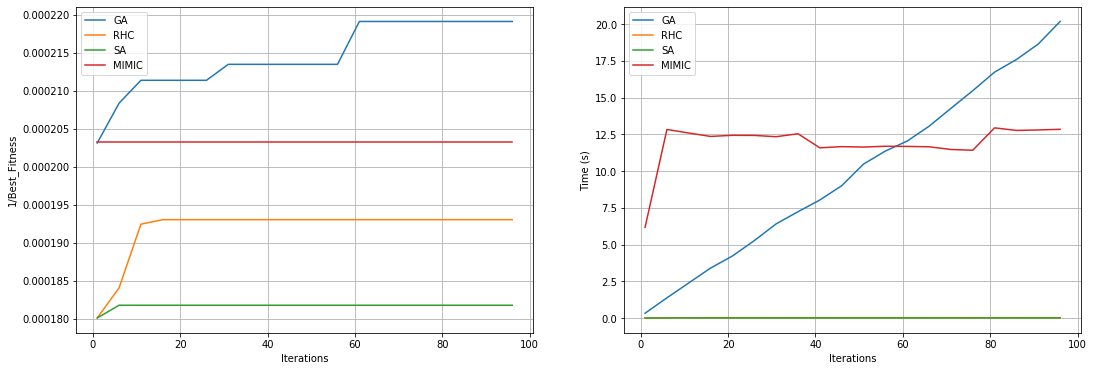

In [62]:
# Apply the hyperparamters found to each of the algorithms and plot over iterations

# Create a list of city coordinates
#coords_list = [(1,1), (4,2), (5,2), (6,4), (4,4), (3,6), (1,5), (2,3)]
coords_list = np.random.rand(100, 2) * 100
# https://stackoverflow.com/questions/53341772/how-to-create-10-000-random-coordinates-in-python
# Initialize fitness function object using coords_list
fitness_coords = mlrose.TravellingSales(coords = coords_list)

# Define optimization problem object
problem_fit = mlrose.TSPOpt(length = len(coords_list), fitness_fn = fitness_coords, maximize = False)

# Define variables
ga_fitness = []
ga_time = []
rhc_fitness = []
rhc_time = []
sa_fitness = []
sa_time = []
mimic_fitness = []
mimic_time = []

#iters = [1, 5, 10, 15, 20, 25, 50, 100, 150]
#iters = [1, 5, 10, 15, 20, 25, 50, 100, 150, 500, 1000, 1500, 2000, 2500]
iters = range(1,100,5)

# Genetic Algorithm
for n in iters:
    start = time.time()
    best_state, best_fitness = mlrose.genetic_alg(problem_fit, pop_size = 200, mutation_prob = 0.1, max_attempts = 50, max_iters = n, curve = False, random_state = 2)
    end = time.time() - start
    ga_fitness.append(best_fitness)
    ga_time.append(end)
    
# Random Hill Climbing
for n in iters:
    start = time.time()
    best_state, best_fitness = mlrose.random_hill_climb(problem_fit, max_attempts = 5, max_iters = n, random_state = 2)
    end = time.time() - start
    rhc_fitness.append(best_fitness)
    rhc_time.append(end)
    
# Simulated Annealing
for n in iters:
    start = time.time()
    best_state, best_fitness = mlrose.simulated_annealing(problem_fit, schedule = mlrose.ExpDecay(init_temp = 10, exp_const = 0.05, min_temp =1), max_attempts = 1, max_iters = n, init_state = None, curve = False, random_state = 2)
    end = time.time() - start
    sa_fitness.append(best_fitness)
    sa_time.append(end)

# MIMIC
for n in iters:
    start = time.time()
    best_state, best_fitness = mlrose.mimic(problem_fit, pop_size = 300, keep_pct = 0.1, max_attempts = 1, max_iters = n, curve = False, random_state = 2)
    end = time.time() - start
    mimic_fitness.append(best_fitness)
    mimic_time.append(end)
    
# Analyze Results
ga_fitness_inv = 1/np.array(ga_fitness)
rhc_fitness_inv = 1/np.array(rhc_fitness)
sa_fitness_inv = 1/np.array(sa_fitness)
mimic_fitness_inv = 1/np.array(mimic_fitness)


fig = plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.plot(iters, ga_fitness_inv, label = 'GA')
plt.plot(iters, rhc_fitness_inv, label = 'RHC')
plt.plot(iters, sa_fitness_inv, label = 'SA')
plt.plot(iters, mimic_fitness_inv, label = 'MIMIC')
plt.xlabel('Iterations')
plt.ylabel('1/Best_Fitness')
plt.grid(True)
plt.legend()
plt.subplot(1,2,2)
plt.plot(iters, ga_time, label = 'GA')
plt.plot(iters, rhc_time, label = 'RHC')
plt.plot(iters, sa_time, label = 'SA')
plt.plot(iters, mimic_time, label = 'MIMIC')
plt.xlabel('Iterations')
plt.ylabel('Time (s)')
plt.grid(True)
plt.legend()

In [53]:
# Explore the Genetic Algorithm hyperparameters
# Create a list of city coordinates
#coords_list = [(1,1), (4,2), (5,2), (6,4), (4,4), (3,6), (1,5), (2,3)]
coords_list = np.random.rand(100, 2) * 100
# https://stackoverflow.com/questions/53341772/how-to-create-10-000-random-coordinates-in-python
# Initialize fitness function object using coords_list
fitness_coords = mlrose.TravellingSales(coords = coords_list)

# Define optimization problem object
problem_fit = mlrose.TSPOpt(length = len(coords_list), fitness_fn = fitness_coords, maximize = False)

# Genetic Algorithm
pop_size = [10, 100, 200, 400]
mutation_prob = [0.05, 0.1, 0.2, 0.5]

ga_Data = []

for p in pop_size:
    for mp in mutation_prob:
        start = time.time()
        best_state, best_fitness = mlrose.genetic_alg(problem_fit, pop_size = p, mutation_prob = mp, max_attempts = 50, curve = False, random_state = 2)
        end = time.time() - start
        best_fitness_inv = 1/best_fitness
        label = str(str(p)+','+str(mp))
        ga_Data.append([p, mp, best_fitness_inv, end, label])
        print("Iteration completed for %s"%label)

ga = pd.DataFrame(columns = ['Population_Size', 'Mutation_Prob', 'Best_Fitness_Inv', 'Runtime', 'Label'], data = ga_Data)

Iteration completed for 10,0.05
Iteration completed for 10,0.1
Iteration completed for 10,0.2
Iteration completed for 10,0.5
Iteration completed for 100,0.05
Iteration completed for 100,0.1
Iteration completed for 100,0.2
Iteration completed for 100,0.5
Iteration completed for 200,0.05
Iteration completed for 200,0.1
Iteration completed for 200,0.2
Iteration completed for 200,0.5
Iteration completed for 400,0.05
Iteration completed for 400,0.1
Iteration completed for 400,0.2
Iteration completed for 400,0.5


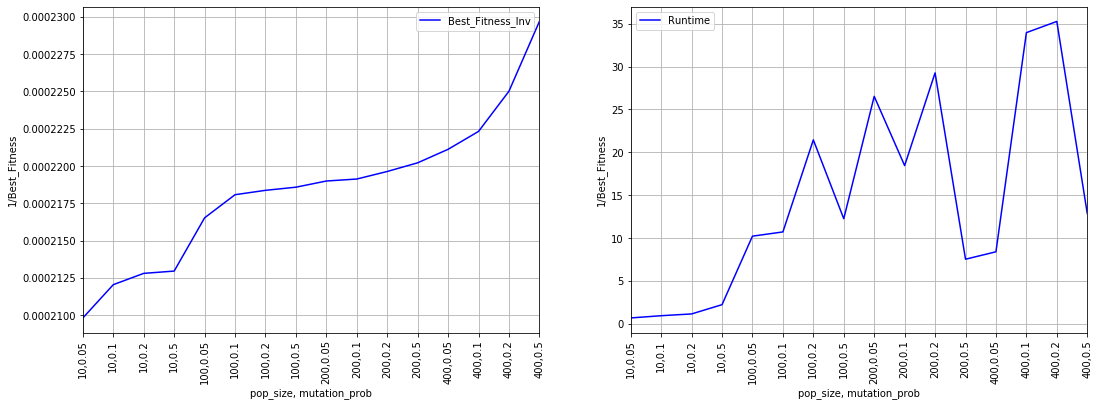

In [66]:
# Plot hyperparameter combinations vs fitness
#fig = plt.figure(figsize=(24,6))
#ga.sort_values('Best_Fitness_Inv').plot(kind='line',x='Label',y='Best_Fitness_Inv',color='blue')
#plt.xticks(ga.index, ga['Label'], rotation=90)
#plt.xlabel('pop_size, mutation_prob')
#plt.ylabel('1/Best_Fitness')
#plt.grid(True)


fig, (ax, ax2) = plt.subplots(ncols=2, sharey=False, figsize=(18,6))
ga.sort_values('Best_Fitness_Inv').plot(x='Label', y='Best_Fitness_Inv',kind='line',ax=ax, color = 'blue')
ax.set_xticks(ga.index)
ax.set_xticklabels(ga['Label'], rotation=90)
ax.set_xlabel('pop_size, mutation_prob')
ax.set_ylabel('1/Best_Fitness')
ax.grid(True)
ga.sort_values('Best_Fitness_Inv').plot(x='Label', y='Runtime',kind='line', ax=ax2, color = 'blue')
ax2.set_xticks(ga.index)
ax2.set_xticklabels(ga['Label'], rotation=90)
ax2.set_xlabel('pop_size, mutation_prob')
ax2.set_ylabel('1/Best_Fitness')
ax2.grid(True)

In [57]:
# Continuous Peaks
# https://github.com/gkhayes/mlrose/blob/master/mlrose/fitness.py

# Define fitness function
fitness = mlrose.ContinuousPeaks(t_pct=0.15)

# Define state space
#state = np.random.randint(2, size=100)
state = np.random.choice([0, 1], size=100)
#state = np.array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1])

# Define optimization problem object
problem_fit = mlrose.DiscreteOpt(length = len(state), fitness_fn = fitness, maximize = True, max_val =2)

# Genetic Algorithm
pop_size = [10, 50, 100, 200, 300]
mutation_prob = [0.05, 0.1, 0.2, 0.5]
max_attempts = [1, 5, 10, 25, 50, 100]

ga_Data = []

for p in pop_size:
    for mp in mutation_prob:
        for ma in max_attempts:
            start = time.time()
            best_state, best_fitness, iter_fit = mlrose.genetic_alg(problem_fit, pop_size = p, mutation_prob = mp, max_attempts = ma, curve = True, random_state = 2)
            end = time.time() - start
            n_iters = len(iter_fit)
            ga_Data.append([p, mp, ma, n_iters, best_fitness])

ga = pd.DataFrame(columns = ['Population_Size', 'Mutation_Prob', 'Max_Attempts', 'Num_Iters', 'Best_Fitness'], data = ga_Data)

print("The best population size and mutation probabilty for Genetic Algorithm is:")
print(ga.loc[ga['Best_Fitness'].idxmax()])
print("")

# Simulated Annealing
exp = [0.01, 0.05, 0.1, 0.25, 0.5, 0.75]
max_attempts = [1, 5, 10, 25, 50, 100]

sa_Data = []

for n in exp:
    for ma in max_attempts:
        start = time.time()
        best_state, best_fitness, iter_fit = mlrose.simulated_annealing(problem_fit, schedule = mlrose.ExpDecay(init_temp = 10, exp_const = n, min_temp =1), max_attempts = ma, init_state = None, curve = True, random_state = 2)
        end = time.time() - start
        n_iters = len(iter_fit)
        sa_Data.append([n, ma, n_iters, best_fitness])
    
sa = pd.DataFrame(columns = ['Exponent', 'Max_Attempts', 'Num_Iters', 'Best_Fitness'], data = sa_Data)

print("The best cooling exponent for Simulated Annealing is:")
print(sa.loc[sa['Best_Fitness'].idxmax()])
print("")

# MIMIC
pop_size = [10, 50, 100, 200, 300]
keep_pct = [0.05, 0.1, 0.2, 0.5]
max_attempts = [1, 5, 10, 25, 50, 100]

mimic_Data = []

for p in pop_size:
    for kp in keep_pct:
        for ma in max_attempts:
            start = time.time()
            best_state, best_fitness, iter_fit = mlrose.mimic(problem_fit, pop_size = p, keep_pct = kp, max_attempts = ma, curve = True, random_state = 2)
            end = time.time() - start
            n_iters = len(iter_fit)
            mimic_Data.append([p, kp, ma, n_iters, best_fitness])

mimic = pd.DataFrame(columns = ['Population_Size', 'Keep_Pct', 'Max_Attempts', 'Num_Iters', 'Best_Fitness'], data = mimic_Data)

print("The best population size and keep percent for MIMIC is:")
print(mimic.loc[mimic['Best_Fitness'].idxmax()])
print("")

The best population size and mutation probabilty for Genetic Algorithm is:
Population_Size    300.00
Mutation_Prob        0.05
Max_Attempts       100.00
Num_Iters          291.00
Best_Fitness       138.00
Name: 101, dtype: float64

The best cooling exponent for Simulated Annealing is:
Exponent           0.01
Max_Attempts      50.00
Num_Iters       4046.00
Best_Fitness     100.00
Name: 4, dtype: float64

The best population size and keep percent for MIMIC is:
Population_Size    300.0
Keep_Pct             0.2
Max_Attempts         5.0
Num_Iters           17.0
Best_Fitness       140.0
Name: 109, dtype: float64



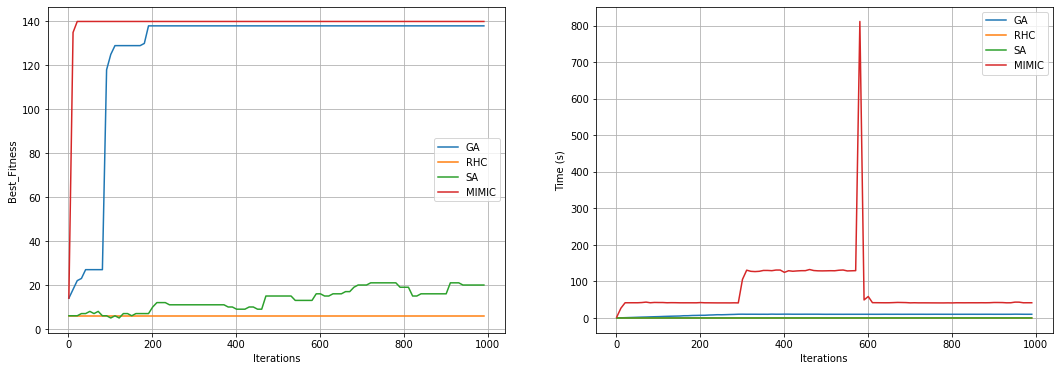

In [60]:
# Continuous Peaks
# https://github.com/gkhayes/mlrose/blob/master/mlrose/fitness.py

# Define fitness function
fitness = mlrose.ContinuousPeaks(t_pct=0.15)

# Define state space
#state = np.random.randint(2, size=100)
init_state = np.random.choice([0, 1], size=100)
#state = np.array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1])

# Define optimization problem object
problem_fit = mlrose.DiscreteOpt(length = len(init_state), fitness_fn = fitness, maximize = True, max_val =2)

# Define variables
ga_fitness = []
ga_time = []
rhc_fitness = []
rhc_time = []
sa_fitness = []
sa_time = []
mimic_fitness = []
mimic_time = []

iters = [1, 5, 10, 15, 20, 25, 50, 100, 150, 500, 1000, 1500, 2000, 2500]
#iters = [1, 10, 100]
iters = range(1,1001,10)
# Genetic Algorithm
for n in iters:
    start = time.time()
    best_state, best_fitness = mlrose.genetic_alg(problem_fit, pop_size = 300, mutation_prob = 0.05, max_attempts = 100, max_iters = n, curve = False, random_state = 2)
    end = time.time() - start
    ga_fitness.append(best_fitness)
    ga_time.append(end)
    
# Random Hill Climbing
for n in iters:
    start = time.time()
    best_state, best_fitness = mlrose.random_hill_climb(problem_fit, init_state = init_state, max_attempts = 5, max_iters = n, random_state = 2)
    end = time.time() - start
    rhc_fitness.append(best_fitness)
    rhc_time.append(end)
    
# Simulated Annealing
for n in iters:
    start = time.time()
    best_state, best_fitness = mlrose.simulated_annealing(problem_fit, init_state = init_state, schedule = mlrose.ExpDecay(init_temp = 10, exp_const = 0.01, min_temp =1), max_attempts = 50, max_iters = n, curve = False, random_state = 2)
    end = time.time() - start
    sa_fitness.append(best_fitness)
    sa_time.append(end)

# MIMIC
for n in iters:
    start = time.time()
    best_state, best_fitness = mlrose.mimic(problem_fit, pop_size = 300, keep_pct = 0.2, max_attempts = 5, max_iters = n, curve = False, random_state = 2)
    end = time.time() - start
    mimic_fitness.append(best_fitness)
    mimic_time.append(end)
    

fig = plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
plt.plot(iters, ga_fitness, label = 'GA')
plt.plot(iters, rhc_fitness, label = 'RHC')
plt.plot(iters, sa_fitness, label = 'SA')
plt.plot(iters, mimic_fitness, label = 'MIMIC')
plt.xlabel('Iterations')
plt.ylabel('Best_Fitness')
plt.grid(True)
plt.legend()
plt.subplot(1,2,2)
plt.plot(iters, ga_time, label = 'GA')
plt.plot(iters, rhc_time, label = 'RHC')
plt.plot(iters, sa_time, label = 'SA')
plt.plot(iters, mimic_time, label = 'MIMIC')
plt.xlabel('Iterations')
plt.ylabel('Time (s)')
plt.grid(True)
plt.legend()

In [12]:
# Explore parameter tuning for MIMIC
# Define fitness function
fitness = mlrose.ContinuousPeaks(t_pct=0.15)

# Define state space
#state = np.random.randint(2, size=100)
init_state = np.random.choice([0, 1], size=100)
#state = np.array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1])

# Define optimization problem object
problem_fit = mlrose.DiscreteOpt(length = len(init_state), fitness_fn = fitness, maximize = True, max_val =2)

mimic_Data = []

pop_size = [10, 100, 200, 300]
keep_pct = [0.05, 0.1, 0.2, 0.5]

for p in pop_size:
    for kp in keep_pct:
        start = time.time()
        best_state, best_fitness = mlrose.mimic(problem_fit, pop_size = p, keep_pct = kp, max_attempts = 5, curve = False, random_state = 2)
        end = time.time() - start
        label = str(str(p)+','+str(kp))
        print("Iteration completed for %s"%label)
        mimic_Data.append([p, kp, best_fitness, end, label])
        
mimic_results = pd.DataFrame(columns = ['pop_size', 'keep_pct', 'best_fitness', 'runtime', 'label'], data = mimic_Data)

Iteration completed for 10,0.05
Iteration completed for 10,0.1
Iteration completed for 10,0.2
Iteration completed for 10,0.5
Iteration completed for 100,0.05
Iteration completed for 100,0.1
Iteration completed for 100,0.2
Iteration completed for 100,0.5
Iteration completed for 200,0.05
Iteration completed for 200,0.1
Iteration completed for 200,0.2
Iteration completed for 200,0.5
Iteration completed for 300,0.05
Iteration completed for 300,0.1
Iteration completed for 300,0.2
Iteration completed for 300,0.5


In [16]:
mimic_Data.sort(key=lambda mimic_Data:mimic_Data[2])
print(mimic_Data)

[[10, 0.05, 10.0, 11.46444582939148, '10,0.05'], [10, 0.1, 10.0, 11.224066972732544, '10,0.1'], [10, 0.2, 10.0, 11.451584100723267, '10,0.2'], [10, 0.5, 10.0, 11.589271068572998, '10,0.5'], [100, 0.05, 14.0, 13.94914984703064, '100,0.05'], [100, 0.5, 15.0, 14.082050085067749, '100,0.5'], [200, 0.5, 16.0, 16.82034158706665, '200,0.5'], [100, 0.1, 19.0, 16.573210954666138, '100,0.1'], [300, 0.5, 19.0, 15.075817346572876, '300,0.5'], [200, 0.05, 23.0, 18.85232424736023, '200,0.05'], [200, 0.2, 27.0, 28.73361325263977, '200,0.2'], [100, 0.2, 30.0, 30.7158522605896, '100,0.2'], [200, 0.1, 116.0, 31.240161418914795, '200,0.1'], [300, 0.05, 116.0, 21.432097911834717, '300,0.05'], [300, 0.1, 121.0, 28.79015326499939, '300,0.1'], [300, 0.2, 140.0, 41.65292048454285, '300,0.2']]


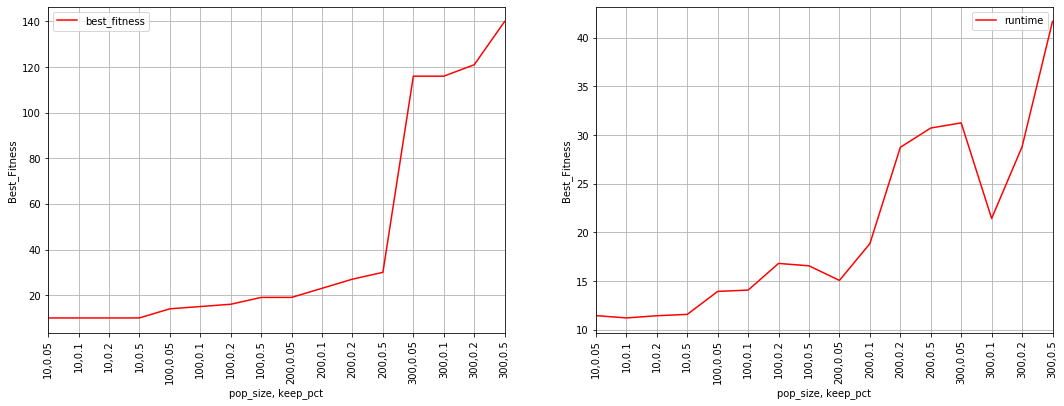

In [67]:
# Plot hyperparameter combinations vs fitness
#fig = plt.figure(figsize=(24,6))
#ga.sort_values('Best_Fitness_Inv').plot(kind='line',x='Label',y='Best_Fitness_Inv',color='blue')
#plt.xticks(ga.index, ga['Label'], rotation=90)
#plt.xlabel('pop_size, mutation_prob')
#plt.ylabel('1/Best_Fitness')
#plt.grid(True)


fig, (ax, ax2) = plt.subplots(ncols=2, sharey=False, figsize=(18,6))
mimic_results.sort_values('best_fitness').plot(x='label', y='best_fitness',kind='line',ax=ax, color = 'red')
ax.set_xticks(mimic_results.index)
ax.set_xticklabels(mimic_results['label'], rotation=90)
ax.set_xlabel('pop_size, keep_pct')
ax.set_ylabel('Best_Fitness')
ax.grid(True)
mimic_results.sort_values('best_fitness').plot(x='label', y='runtime',kind='line', ax=ax2, color = 'red')
ax2.set_xticks(mimic_results.index)
ax2.set_xticklabels(mimic_results['label'], rotation=90)
ax2.set_xlabel('pop_size, keep_pct')
ax2.set_ylabel('Best_Fitness')
ax2.grid(True)